Made By Mohammed Imran Mohsin

# PDF & WORD content classifier Notebook

In [1]:
# Tracking Time Taken to Execute this Notebook
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 18:56:26


#### Loading in the Dataset CSV File

In [2]:
# Importing the pandas and numpy library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the data
path = "dataset/bbc-text.csv"
data = pd.read_csv(path)
dataI = data.copy()

#### Dataset Table

In [3]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


#### Dataset Description

In [4]:
data.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,singapore growth at 8.1% in 2004 singapore s e...
freq,511,2


In [5]:
# Output Classification Tags as shown below
classes = data['category'].unique()
print("Different Categories (Tags):",classes)

Different Categories (Tags): ['tech' 'business' 'sport' 'entertainment' 'politics']


In [6]:
# Category Data count ~~ To avoide Extream Bias Distribution of train data
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

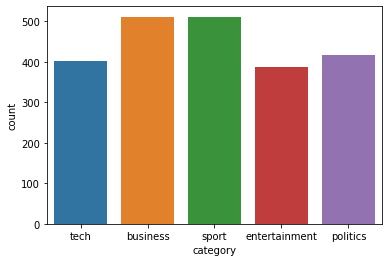

In [7]:
# Importing seaborn for matplotlib plots
import seaborn as sb

sb.countplot(x='category',data = data)

In [8]:
def balance_categories(dataframe):
    dataframe=data['category']
    cTech= 401 - 386
    cBusiness= 510 - 386
    cSport= 511 - 386
    cPolitics= 417 - 386

    index=0

    iTech = []
    iBusiness = []
    iSport = []
    iPolitics = []
    iArray = []

    for item in dataframe:
        if item == "tech":
            if cTech!=0:
                #iTech.append(index)
                iArray.append(index)
                cTech=cTech-1
        if item == "business":
            if cBusiness!=0:
                #iBusiness.append(index)
                iArray.append(index)
                cBusiness=cBusiness-1
        if item == "sport":
            if cSport!=0:
                #iSport.append(index)
                iArray.append(index)
                cSport=cSport-1
        if item == "politics":
            if cPolitics!=0:
                #iPolitics.append(index)
                iArray.append(index)
                cPolitics=cPolitics-1
        index=index+1
    dataframe = dataframe.drop(iArray,axis=0)
    return dataframe
dataFilter = balance_categories(data['category'])
dataFilter.value_counts()

politics         386
entertainment    386
business         386
tech             386
sport            386
Name: category, dtype: int64

In [9]:
data['category'] = dataFilter
data = data.dropna()
data = data.reset_index(drop=True)
data

,category,text
0,entertainment,ocean s twelve raids box office ocean s twelve...
1,entertainment,last star wars not for children the sixth an...
2,entertainment,berlin cheers for anti-nazi film a german movi...
3,entertainment,career honour for actor dicaprio actor leonard...
4,entertainment,halloween writer debra hill dies screenwriter ...
...,...,...
1925,business,cars pull down us retail figures us retail sal...
1926,politics,kilroy unveils immigration policy ex-chatshow ...
1927,entertainment,rem announce new glasgow concert us band rem h...
1928,politics,how political squabbles snowball it s become c...


In [10]:
data['category'].value_counts()

politics         386
entertainment    386
business         386
tech             386
sport            386
Name: category, dtype: int64

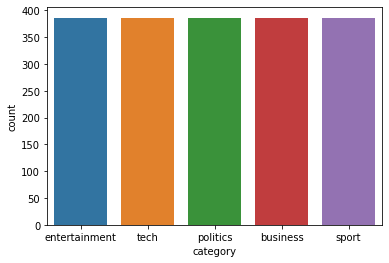

In [11]:
import seaborn as sb

sb.countplot(x='category',data = data)

**Data Pre-Processing**


In [12]:
# Importing libraries:
# Natural Language Toolkit & Regular Expression Library
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 

# Loading the stop words list, Stemmer and lemmatizer
stop_words = set(stopwords.words("english")) 
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 

In [13]:
# method to filter the text by removing stop words
def filtering_words(text):
    words = text.split()
    new_words_list = []
    for word in words:
        if word not in stop_words:
            word = stemmer.stem(word)
            word = lemmatizer.lemmatize(word, pos ='v')
            new_words_list.append(word)
    return " ".join(new_words_list)

# Method to Cleaning the text content
def preprocess(text):
    text = text.lower()
    # Using Regular Expression to replace non-alphabets with null
    text = clean_text(text)
    text = re.sub('[^a-zA-Z ]','',text)
    text = filtering_words(text)
    return text

# Rephrasing certain text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

#### Example Before-After Pre-Processing Method

In [14]:
print("Before preprocess method:\n\n",data['text'][25])

Before preprocess method:

 2d metal slug offers retro fun like some drill sergeant from the past  metal slug 3 is a wake-up call to today s gamers molly-coddled with slick visuals and fancy trimmings.  with its hand-animated sprites and 2d side-scrolling  this was even considered retro when released in arcades four years ago. but a more frantic shooter you will not find at the end of your joypad this year. and yes  that includes halo 2. simply choose your grunt and wade through five 2d side-scrolling levels of the most hectic video game blasting you will ever encounter. it is also the toughest game you are likely to play  as hordes of enemies and few lives pile the pressure on.  players must battle soldiers  snowmen  zombies  giant crabs and aliens  not to mention the huge  screen-filling bosses that guard each of the five levels.  the shoot-anything-that-moves gameplay is peppered with moments of old-school genius. fans of robotic gastropods should note the title refers  instead  to 

In [15]:
print("After preprocess method:\n\n",preprocess(data['text'][25]))
print("\nCategory:",data['category'][25])

After preprocess method:

 metal slug offer retro fun like drill sergeant past metal slug wake call today gamer molli coddl slick visual fanci trim hand anim sprite side scroll even consid retro releas arcad four year ago frantic shooter find end joypad year ye includ halo simpli choos grunt wade five side scroll level hectic video game blast ever encount also toughest game like play hord enemi live pile pressur player must battl soldier snowmen zombi giant crab alien mention huge screen fill boss guard five level shoot anyth move gameplay pepper moment old school geniu fan robot gastropod note titl refer instead vast array vehicl offer game stuf bizarr hardwar tank jet submarin command well cannon tote camel eleph ostrich weaponri offer acr iraq dole justic joy thank ultra respons control tough nut crack addict enough gag one last go mere metal slug cheap slice fri spud man say cours ignor lack visual firework modern blaster time blockbust titl offer fresh lick paint favour real innov

#### Pre-Processing Entire Dataset

In [16]:
X = data['text'].apply(lambda x:preprocess(x))

#### Converting Input text to suitable features

In [17]:
# convert the input text to suitable features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.model_selection import train_test_split

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

x_counts = count_vectorizer.fit_transform(X)
x_tfidf = tfidf_vectorizer.fit_transform(X)

x_new = x_counts

label_encoder = LabelEncoder()
y = label_encoder.fit_transform( data['category'] )
print("Label Encodings:",y)

Label Encodings: [1 1 1 ... 1 2 3]


**Splitting the dataset**

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y,test_size=0.17)
ytest = np.array(y_test)
print("Size of Training data:",x_train.shape[0])
print("Size of Testing data:",x_test.shape[0])

Size of Training data: 1601
Size of Testing data: 329


### ML Algorithms:
#### 1.Naive Bayes
#### 2. Decision Tree

In [19]:
# Loading Libraries
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

# Validating Methods
def check_accuracy(model,x_test,y_test):
    total = x_test.shape[0]
    count =  0
    res = model.predict(x_test)
    for i in range(total):
        y_true = y_test[i]
        if y_true == res[i]:
            count+=1
    return count/total


### Naive Bayes


In [20]:
# Loading Naive Bayes Libraries
from sklearn.naive_bayes import MultinomialNB
NaiveBayes_model = MultinomialNB()
NaiveBayes_classifier = NaiveBayes_model.fit(x_train,y_train)

Naive Bayes Accuracy: 0.9848024316109423 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.99      0.99      0.99        83
           2       0.97      0.97      0.97        59
           3       1.00      1.00      1.00        67
           4       1.00      0.98      0.99        56

    accuracy                           0.98       329
   macro avg       0.98      0.98      0.98       329
weighted avg       0.98      0.98      0.98       329



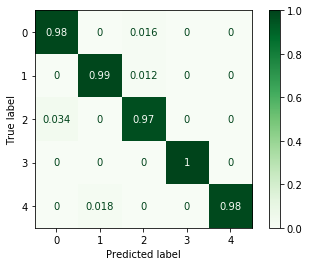

In [21]:
# Validating Model
print("Naive Bayes Accuracy:",check_accuracy(NaiveBayes_model,x_test,y_test),"\n")
print(classification_report(ytest, NaiveBayes_model.predict(x_test)))

title_option = [("Normalized confusion matrix",'true')]
for title, normalize in title_option:
    disp = plot_confusion_matrix(NaiveBayes_classifier, x_test,ytest,
                                cmap=plt.cm.Greens,
                                normalize=normalize)

### Decision Tree

In [22]:
# Loading Decision Tree libraires
from sklearn.tree import DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_classifier = DecisionTree_model.fit(x_train,y_train)

Decision Tree Accuracy: 0.9027355623100304 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        64
           1       0.92      0.88      0.90        83
           2       0.87      0.90      0.88        59
           3       0.94      0.94      0.94        67
           4       0.88      0.91      0.89        56

    accuracy                           0.90       329
   macro avg       0.90      0.90      0.90       329
weighted avg       0.90      0.90      0.90       329



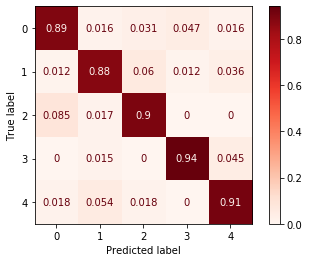

In [23]:
# Validating Model
print("Decision Tree Accuracy:",check_accuracy(DecisionTree_model,x_test,y_test),"\n")
print(classification_report(ytest, DecisionTree_model.predict(x_test)))

title_option = [("Normalized confusion matrix",'true')]
for title, normalize in title_option:
    disp = plot_confusion_matrix(DecisionTree_classifier, x_test,ytest,
                                cmap=plt.cm.Reds,
                                normalize=normalize)

### Accuracy across all Algorithms:

In [24]:
print("Naive Bayes Accuracy:",check_accuracy(NaiveBayes_model,x_test,y_test))
print("Desicion Tree Accuracy:",check_accuracy(DecisionTree_model,x_test,y_test))

Naive Bayes Accuracy: 0.9848024316109423
Desicion Tree Accuracy: 0.9027355623100304


### Confusion Matrix of all Algorithms:


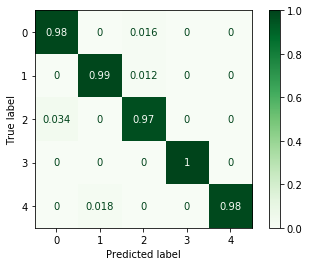

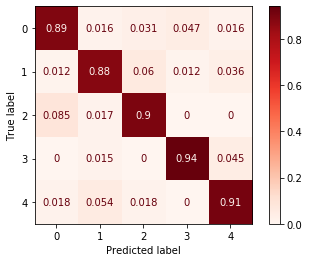

In [25]:
# Naive Bayes
for title, normalize in title_option:
    disp = plot_confusion_matrix(NaiveBayes_classifier, x_test,ytest,
                                cmap=plt.cm.Greens,
                                normalize=normalize)
# Decision Tree
for title, normalize in title_option:
    disp = plot_confusion_matrix(DecisionTree_classifier, x_test,ytest,
                                cmap=plt.cm.Reds,
                                normalize=normalize)

### Prediction Test for all Algorithms:

In [26]:
# Sample Data 
sample_data1 = " howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an  attack mongrel  shows labour is  rattled  by the opposition.  in an upbeat speech to his party s spring conference in brighton  he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate.  something tells me that someone  somewhere out there is just a little bit rattled   mr howard said. mr hain  leader of the commons  told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk."
sample_data2 = " moya fights back for indian title carlos moya became the first man to successfully defend the chennai open title by beating four-times finalist paradorn srichaphan 3-6 6-4 7-6 (7/5).  the spaniard then donated his £28 000 prize money to relief efforts for the victims of the asian tsunami. the final was close throughout  with thai second seed srichaphan - the 2003 winner - closing out the first set. but moya took the second set  before bouncing back from 5-2 down in the decider to force and win a tie-break."
processed_data = preprocess(sample_data1)
x_sample = count_vectorizer.transform([processed_data])

# Sample Data 2 Preview ~~ Category: SPORTS
'''
 moya fights back for indian title carlos moya became the first man to successfully defend the chennai open title 
 by beating four-times finalist paradorn srichaphan 3-6 6-4 7-6 (7/5).  the spaniard then donated his £28 000 prize 
 money to relief efforts for the victims of the asian tsunami. the final was close throughout  with thai second seed 
 srichaphan - the 2003 winner - closing out the first set. but moya took the second set  before bouncing back from 
 5-2 down in the decider to force and win a tie-break.
'''

# Sample Data 1 Preview ~~ Category: POLITICS
'''
 howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting 
 like an  attack mongrel  shows labour is  rattled  by the opposition.  in an upbeat speech to his party s spring
 conference in brighton  he said labour s campaigning tactics proved the tories were hitting home. mr hain made
 the claim about tory tactics in the anti-terror bill debate.  something tells me that someone  somewhere out 
 there is just a little bit rattled   mr howard said. mr hain  leader of the commons  told bbc radio four s 
 today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk.
'''

NaiveBayes_result =  NaiveBayes_model.predict(x_sample)
DecisionTree_result = DecisionTree_model.predict(x_sample)

NaiveBayes_result = label_encoder.inverse_transform(NaiveBayes_result)
DecisionTree_result = label_encoder.inverse_transform(DecisionTree_result)

print("Naive Bayes Result:",NaiveBayes_result)
print("Decision Tree Result:",DecisionTree_result)

Naive Bayes Result: ['politics']
Decision Tree Result: ['politics']


### Exporting the Model

In [27]:
from sklearn.pipeline import Pipeline
import pickle

classifier_model = Pipeline([('clf', MultinomialNB())])
classifier_model.fit(x_train,y_train)
classifier_sample_data = [sample_data1,sample_data2]
count=1
for sample in classifier_sample_data:
    processed_data = preprocess(sample)
    classifier_x_sample = count_vectorizer.transform([processed_data])
    classifier_result =  classifier_model.predict(classifier_x_sample)
    classifier_result = label_encoder.inverse_transform(classifier_result)
    print("Sample",count,"Tag =>",classifier_result[0].upper())
    count=count+1

Sample 1 Tag => POLITICS
Sample 2 Tag => SPORT


In [28]:
NB_model = Pipeline([('clf', MultinomialNB())])
NB_model.fit(x_train,y_train)
DT_model = Pipeline([('clf', DecisionTreeClassifier())])
DT_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [29]:
# Save the Module to file in the current working directory
with open('1NB_model','wb') as file:
    pickle.dump(NB_model,file)
with open('2DT_model','wb') as file:
    pickle.dump(DT_model,file)

In [30]:
with open('vectorizer.pickle','wb') as file:
    pickle.dump(count_vectorizer,file)

In [31]:
# Reading the Module from file in the current working directory
with open('1NB_model','rb') as file:
    pickled_NB_model=pickle.load(file)
with open('2DT_model','rb') as file:
    pickled_DT_model=pickle.load(file)

In [32]:
print("Pickle Naive Bayes Module File \n Tag:",label_encoder.inverse_transform(pickled_NB_model.predict(x_sample))[0].upper())
print("Pickle Decision Tree Module File \n Tag:",label_encoder.inverse_transform(pickled_DT_model.predict(x_sample))[0].upper())

Pickle Naive Bayes Module File 
 Tag: POLITICS
Pickle Decision Tree Module File 
 Tag: POLITICS


In [33]:
later = datetime.now()
current_time = later.strftime("%H:%M:%S")
print("Current Time =", current_time)
duration = str(later-now)
print("Time Taken =", duration.split(".")[0])

Current Time = 18:56:44
Time Taken = 0:00:17
